In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install keras==2.3.1

In [ ]:
#!pip install tensorflow==2.0.0-beta1

In [ ]:
import keras

In [ ]:
import tensorflow as tf

In [ ]:
from keras.models import Sequential, Model

In [ ]:
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten

In [ ]:
from keras.optimizers import Adam

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
import numpy as np

In [ ]:
train_path = '/content/drive/MyDrive/drawings/training'
test_path = '/content/drive/MyDrive/drawings/testing'

In [ ]:
train= tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test= tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
training_set = train.flow_from_directory(train_path, target_size=(224, 224), class_mode = 'categorical', classes=['healthy', 'parkinson'], shuffle=False, batch_size=24)
val_set = test.flow_from_directory(test_path, target_size=(224, 224), class_mode = 'categorical', classes=['healthy', 'parkinson'], shuffle=False, batch_size=24)

Found 144 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
print(training_set.image_shape)

(224, 224, 3)


(24, 224, 224, 3)


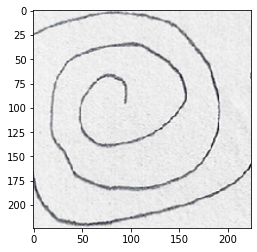

(24, 224, 224, 3)


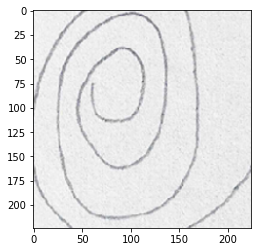

(24, 224, 224, 3)


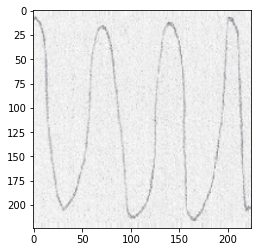

In [ ]:
for _ in range(0, 3):
  img, label = training_set.next()
  print(img.shape)
  plt.imshow(img[0])
  plt.show()

In [ ]:
vgg16_model = keras.applications.vgg16.VGG16()

In [ ]:
model = Sequential()

In [ ]:
for layer in vgg16_model.layers[:-4]:
  model.add(layer)

for layer in model.layers:
  layer.trainable = False

In [ ]:
for i, layer in enumerate(model.layers):
  print(i, layer.name, layer.trainable)

0 block1_conv1 False
1 block1_conv2 False
2 block1_pool False
3 block2_conv1 False
4 block2_conv2 False
5 block2_pool False
6 block3_conv1 False
7 block3_conv2 False
8 block3_conv3 False
9 block3_pool False
10 block4_conv1 False
11 block4_conv2 False
12 block4_conv3 False
13 block4_pool False
14 block5_conv1 False
15 block5_conv2 False
16 block5_conv3 False
17 block5_pool False


In [ ]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [ ]:
# Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=65)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
History = model.fit_generator(training_set, steps_per_epoch=training_set.n//24, validation_data=val_set, validation_steps=val_set.n//24, epochs=25, verbose=2, callbacks=es)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
6/6 - 112s - loss: 7.9853 - accuracy: 0.4931 - val_loss: 3.4614 - val_accuracy: 0.6250
Epoch 2/25
6/6 - 98s - loss: 3.7594 - accuracy: 0.4583 - val_loss: 0.4458 - val_accuracy: 0.8125
Epoch 3/25
6/6 - 98s - loss: 3.5341 - accuracy: 0.5000 - val_loss: 0.4881 - val_accuracy: 0.6667
Epoch 4/25
6/6 - 99s - loss: 2.1351 - accuracy: 0.5556 - val_loss: 1.5806 - val_accuracy: 0.6250
Epoch 5/25
6/6 - 98s - loss: 2.5582 - accuracy: 0.4792 - val_loss: 0.6329 - val_accuracy: 0.6458
Epoch 6/25
6/6 - 99s - loss: 2.3375 - accuracy: 0.4375 - val_loss: 1.3334 - val_accuracy: 0.3958
Epoch 7/25
6/6 - 98s - loss: 0.9285 - accuracy: 0.6667 - val_loss: 0.2532 - val_accuracy: 0.9167
Epoch 8/25
6/6 - 99s - loss: 1.0798 - accuracy: 0.6597 - val_loss: 0.3373 - val_accuracy: 0.8333
Epoch 9/25
6/6 - 97s - loss: 0.7147 - accuracy: 0.7014 - val_loss: 0.3228 - val_accuracy: 0.9583
Epoch 10/25
6/6 - 99s - loss: 0.5548 - accuracy: 0.6944 - val_loss: 0.2762 - val_accuracy: 0.9375
Epoch 11/25
6/6 - 98s - loss

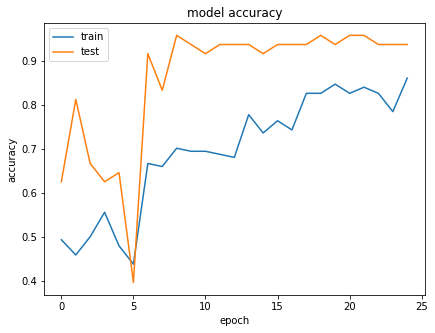

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

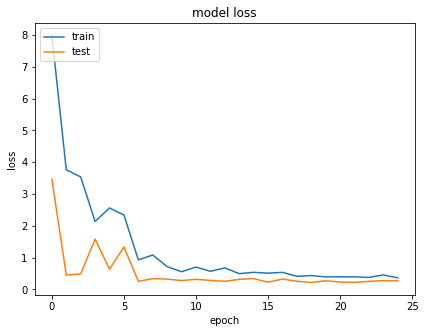

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()

In [ ]:
scores = model.evaluate(val_set)
scores[1]

3/3 [==============================] - 30s 9s/step - loss: 0.3536 - accuracy: 0.8833


0.8833333253860474

In [ ]:
import pandas as pd 
predictions = model.predict_classes(val_set) 
pd.crosstab(val_set.classes, predictions, rownames=['實際值'], colnames=['預測值'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


預測值,0,1
實際值,,
0,28,2
1,5,25
